# Avaliar Algoritmos de Classificação

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "../files/"

## Fazendo Avaliação Cruzada

In [5]:
base = pd.read_csv(file_path + 'credit_data.csv')
base.loc[base.age < 0, 'age'] = 40.92
               
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [6]:
# Classificador
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()

### Realizando o CrossValidation

Ele mesmo faz as predições e só retorna o valor da acurácia delas

In [10]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(classificador, previsores, classe, cv = 10)

print("Precisao para cada teste:\n", resultados)
print("Media dos testes:\n", resultados.mean())
print("Desvio Padrao:\n", resultados.std())

Precisao para cada teste:
 [0.905 0.92  0.955 0.92  0.91  0.96  0.93  0.92  0.89  0.93 ]
Media dos testes:
 0.924
Desvio Padrao:
 0.020223748416156664


## Stratified K-Fold

**PROCESSO DE ESTRATIFICAÇÃO**: Garante que as bases que vai pegar sejam bons representantes do todo

In [12]:
base = pd.read_csv(file_path + 'credit_data.csv')
base.loc[base.age < 0, 'age'] = 40.92
               
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.naive_bayes import GaussianNB

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3)

In [16]:
resultados = []
matrizes = []
for indice_treinamento, indice_teste in kfold.split(previsores,
                                                    np.zeros(shape=(previsores.shape[0], 1))):
    # print('==>Índice treinamento: ', indice_treinamento, '\n Índice teste: ', indice_teste)
    classificador = GaussianNB()
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento]) 
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    matrizes.append(confusion_matrix(classe[indice_teste], previsoes))
    resultados.append(precisao)

In [18]:
# Fazemos a média das 10 matrizes de confunsão em uma só
matriz_final = np.mean(matrizes, axis = 0)
matriz_final

array([[168. ,   3.7],
       [ 11.3,  17. ]])

In [17]:
resultados = np.asarray(resultados)
print(resultados.mean())
print(resultados.std())

0.925
0.017175564037317643


## Fazendo 300 testes por :: K=10 CrossValidation variando 30 Seed

Demora muito mesmo com um NaiveBayes. Deve-se executar em somente um tipo de classificador por vez

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

resultados30 = []
for i in range(30):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = i)
    resultados1 = []
    for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(classe.shape[0], 1))):
        
        ########## Selecione um único classificador por vez
        classificador = GaussianNB()
        #classificador = DecisionTreeClassifier()
        #classificador = LogisticRegression()
        #classificador = SVC(kernel = 'rbf', random_state = 1, C = 2.0)
        #classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
        #classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
        #classificador = MLPClassifier(verbose = True, max_iter = 1000,
        #                       tol = 0.000010, solver='adam',
        #                       hidden_layer_sizes=(100), activation = 'relu',
        #                       batch_size=200, learning_rate_init=0.001)
        ##########
        classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
        previsoes = classificador.predict(previsores[indice_teste])
        precisao = accuracy_score(classe[indice_teste], previsoes)
        resultados1.append(precisao)
        
    resultados1 = np.asarray(resultados1)
    media = resultados1.mean()
    resultados30.append(media)
    
resultados30 = np.asarray(resultados30)    
resultados30.mean()
for i in range(resultados30.size):
    print(str(resultados30[i]).replace('.', ','))

## Curva ROC

In [7]:
base = pd.read_csv(file_path + 'credit_data.csv')
base.loc[base.age < 0, 'age'] = 40.92
               
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size=0.25, random_state=0)

from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)

### Preparando dados para fazer a curva roc

In [9]:
probs = classificador.predict_proba(previsores_teste)
probs = probs[:, 1]

fpr, tpr, thresholds = roc_curve(classe_teste, probs)
roc_auc = auc(fpr, tpr)

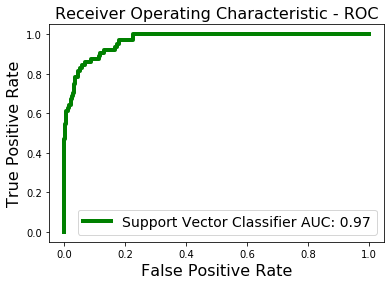

In [28]:
label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic - ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 14)

## CURVA CAP

## Dados para fazer Curva CAP

In [15]:
# Calcular quantidade de elementos de cada classe (as classe sâo numéricas)

total = len(classe_teste)
print("total:", total)

class_1_count = np.sum(classe_teste)
print("class_1_count:", class_1_count)

class_0_count = total - class_1_count
print("class_0_count:", class_0_count)

total: 500
class_1_count 64
class_0_count 436


### Fazendo Curva CAP

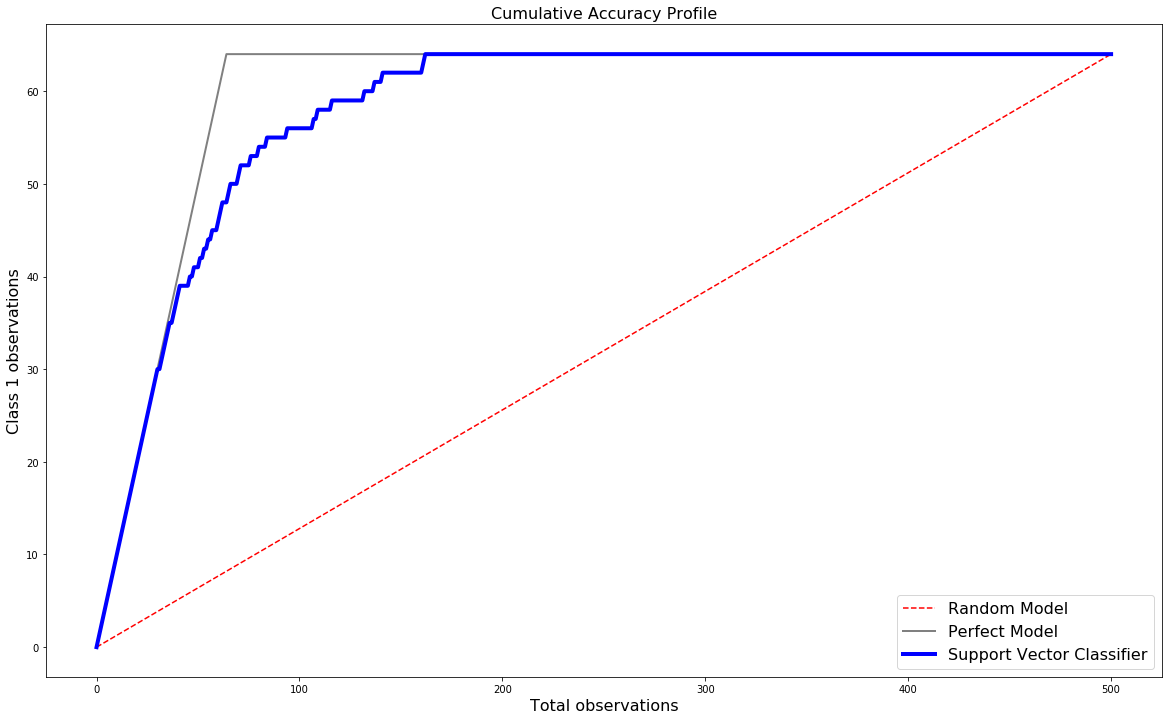

In [17]:
plt.figure(figsize = (20, 12))

plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

probs = classificador.predict_proba(previsores_teste)
# probs = supportVectorClassifier.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, classe_teste), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'Support Vector Classifier', 
         linewidth = 4)

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('Class 1 observations', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

### Calculando valor AUC da curva CAP

In [30]:
# https://www.geeksforgeeks.org/python-cap-cumulative-accuracy-profile-analysis/

# Area under Random Model
a = auc([0, total], [0, class_1_count])

# Area between Perfect and Random Model
aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a

# Area between Trained and Random Model
aR = auc(x_values, y_values) - a

print("Accuracy Rate for CLASSIFY: {}".format(aR / aP))
## Accuracy Rate for Support Vector Classifier: 0.9688542825361512

Accuracy Rate for CLASSIFY: 0.937141628440367
